# 문제정의
- 버섯의 특징을 사용해서 독 / 식용 버섯을 분류

## 목표
- Decision Tree 과대적합 제어 / 시각화 / 특성 선택

# 데이터 수집

In [1]:
import pandas as pd
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.shape

(8124, 23)

# 데이터 전처리 ( 생략 )

## 결측치

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 탐색적 데이터 분석 ( 생략 )

# 모델 선택 및 하이퍼 파라미터 튜닝

In [4]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = data.loc[ : , 'cap-shape' :]
y = data.loc[ : , 'poisonous']

## 인코딩
- 글자 데이터를 수치 데이터로 변환하는 작업

### Label 인코딩

In [6]:
# X1 = X 로하면 같은 주소를 공유
# copy를 쓰면 주소가 달라짐
X1 = X.copy()

In [7]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [8]:
X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [9]:
X1['cap-shape'] = X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

### Onehot 인코딩

In [10]:
X2 = X.copy()

In [11]:
# 원핫인코딩할 컬럼 뽑아서 넣어줘야함
X_one_hot = pd.get_dummies(X2)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 훈련과 평가로 데이터 분리
- one shot 사용

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_one_hot , y , test_size = 0.3)

## 모델 불러오기

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# 학습

In [14]:
tree_model.fit(X_train , y_train)

DecisionTreeClassifier()

# 평가

In [15]:
tree_model.score(X_train , y_train)

1.0

In [16]:
tree_model.score(X_test , y_test)

1.0

# 시각화

In [17]:
!pip install graphviz

In [18]:
# 환경 변수 설정
# 어디서든 잡을 수 있도록 3곳에서 수정해준것
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [19]:
# 그래프 추출  : export_graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=True,
               filled=True)

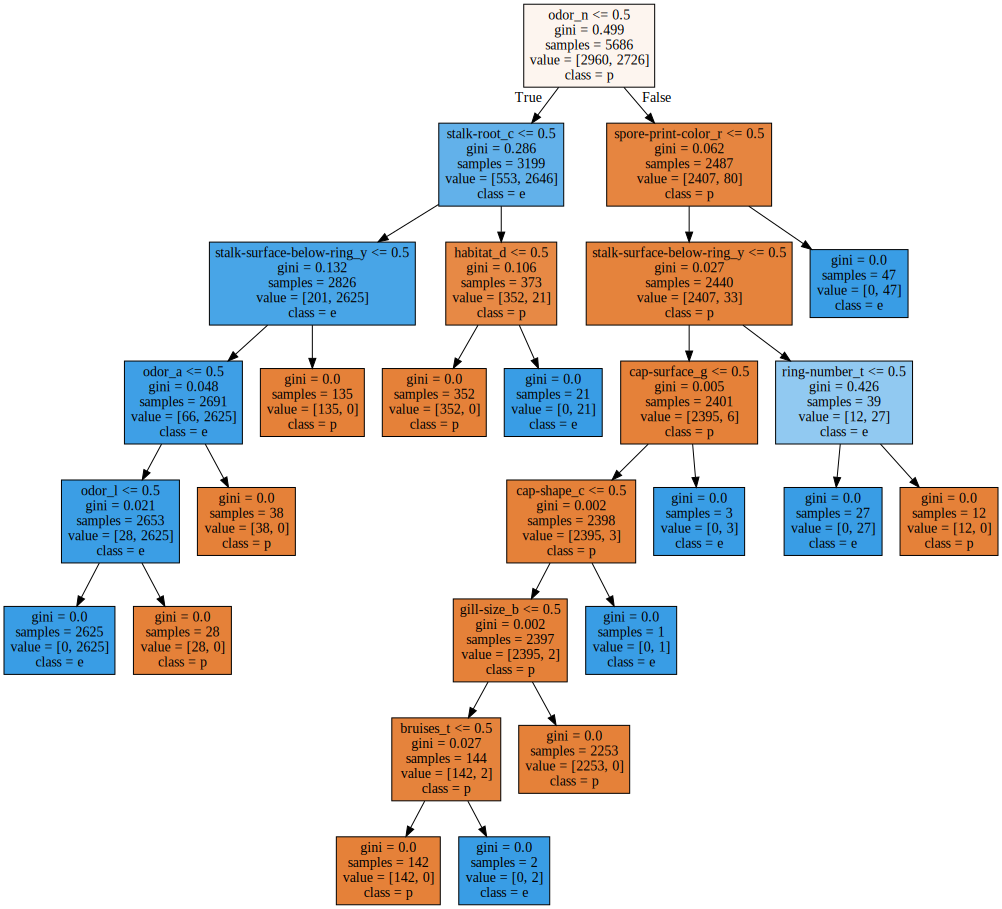

In [20]:
# tree.dot 파일을 시각화 및 파이썬에서 열기 위해 인코딩
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [21]:
# 그림파일로 저장
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 과대적합 제어

## leaf node : 10개로 조정
- leaf node의 수를 10개로 조정한 decisiontree모델 생성
- decisiontree 모델 학습
- decisiontree 모델 평가
- 시각화

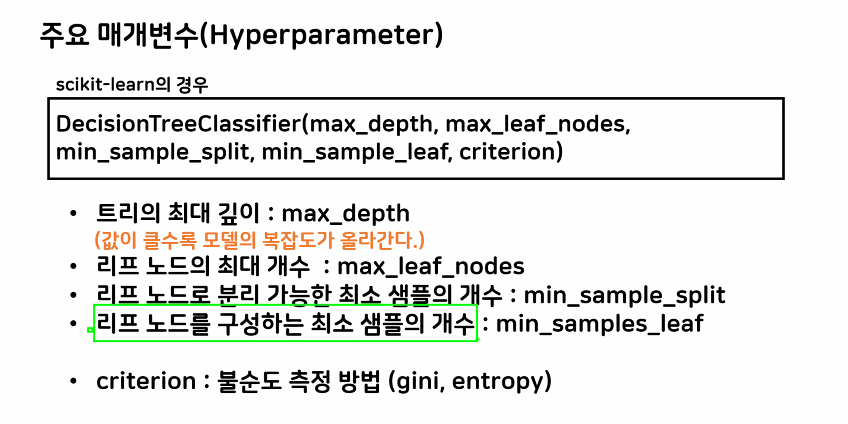

### 모델 생성

In [22]:
tree_model2 = DecisionTreeClassifier(max_leaf_nodes = 10)

### 모델 학습

In [23]:
tree_model2.fit(X_train , y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

### 모델 평가

In [24]:
tree_model2.score(X_train , y_train)

0.9989447766443897

In [25]:
tree_model2.score(X_test , y_test)

0.9991796554552912

### 모델 시각화

In [26]:
export_graphviz(tree_model2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=True,
               filled=True)

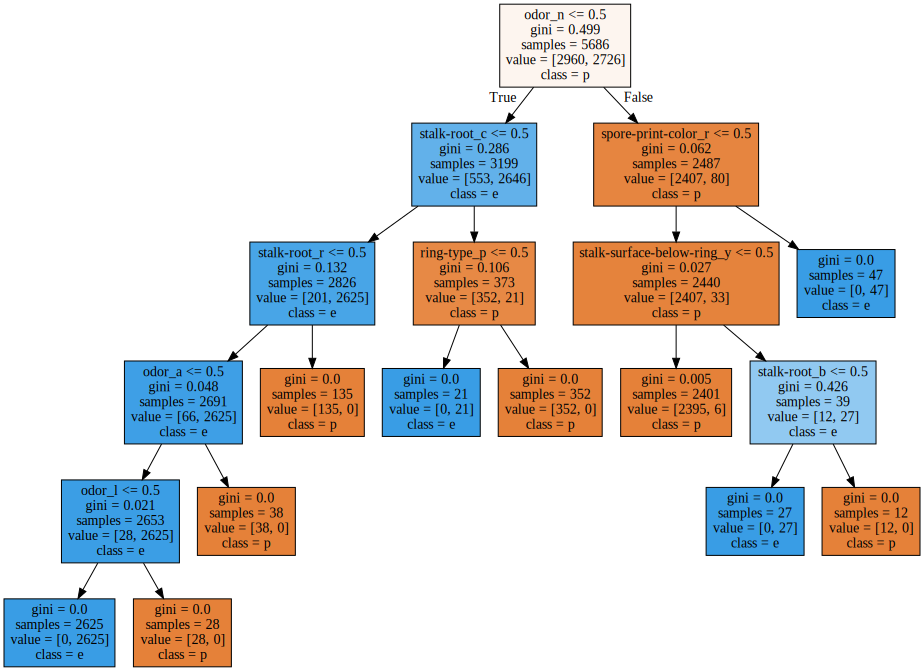

In [27]:
with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### Root Node 해석
1. TRUE, False 판별 기준 -> odor_n <= 0.5
2. 불순도 -> gini = 0.4999
3. 전체 표본 수 -> samples = 5686
4. p는 2974개, e는 2712개 -> value = [2974,2712]
5. 현재 p와 e 중 더 많은쪽 -> class = p

In [ ]:
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

# 교차 검증
1. 모델에 학습을 할때 한번 학습하는것이 아님 -> 하이퍼 파라미터 튜닝을 여러번 진행하고 학습 평가
2. 고정되어있는 데이터셋에 학습 / 평가를 함 -> 머신러닝 모델이 고정되어있는 데이터셋에만 잘 동작
3. 새로운 데이터가 들어오게되면 이 데이터는 평가를 잘 못내림
4. 이런 문제점을 해결하기 위해 사용하는 방법 : 교차 검증

In [29]:
from sklearn.model_selection import cross_val_score
# 사용할 모델, 문제, 정답, 데이터 분할 수
cross_val_score(tree_model, X_train, y_train, cv = 5).mean()

0.9996481970096746

# 특성선택

In [30]:
X_train.shape

(5686, 117)

In [31]:
# 특성의 중요도를 나타냄
# 총 117개의 중요도의 합은 1 이다.
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.03206887e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10610609e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38977707e-03, 2.58452393e-02, 0.00000000e+00,
       0.00000000e+00, 1.95226776e-02, 0.00000000e+00, 6.23117288e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.83983955e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.76791362e-01, 0.00000000e+00, 0.00000000e+00,
      

In [32]:
fi_df = pd.DataFrame(fi, index = X_train.columns)
fi_df.sort_values( by = 0 , ascending = False).head(10)

,0
odor_n,0.623117
stalk-root_c,0.176791
stalk-surface-below-ring_y,0.099066
spore-print-color_r,0.031621
odor_a,0.025845
odor_l,0.019523
habitat_d,0.013965
ring-number_t,0.005854
cap-surface_g,0.002106
bruises_t,0.001390


In [33]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)
cross_val_score(tree, X_train, y_train, cv = 5 ).mean()

0.9985927880386983

In [34]:
tree.score(X_test , y_test)

0.9995898277276456

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : range(1,10),
    'max_leaf_nodes' : range(10,20)
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(10, 20)})

In [36]:
grid.best_score_

0.9996481970096746

In [37]:
grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 13}